In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pylab as pl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
countries = pd.read_csv('datasets/adv_med.csv')

In [4]:
from sklearn.impute import KNNImputer
from numpy import isnan
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num = countries.select_dtypes(include=numerics).columns
# split into input and output elements
X = countries[num].values
# print total missing
print('Missing: %d' % sum(isnan(X).flatten()))
# define imputer
imputer = KNNImputer()
# fit on the dataset
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)
# print total missing
print('Missing: %d' % sum(isnan(Xtrans).flatten()))
total_df = pd.DataFrame()
total_df = total_df.append(pd.DataFrame(Xtrans, columns = num), ignore_index = True)

Missing: 0
Missing: 0


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data_sc = pd.DataFrame(scaler.fit_transform(total_df), columns = countries.select_dtypes(include=numerics).columns)

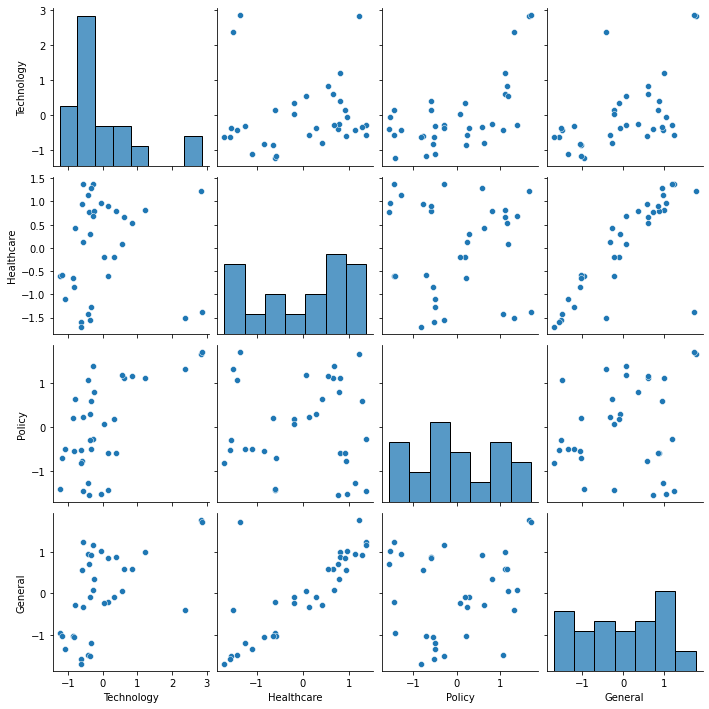

In [6]:
df = data_sc.copy()
sns.pairplot(df)

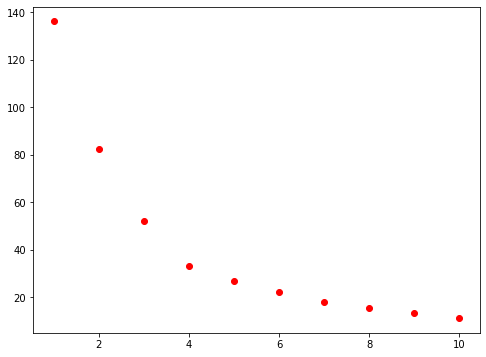

In [7]:
# K-Means Clustering:
cl = 10
corte = 0.1

anterior = 100000000000000
cost = [] 
K_best = cl

for k in range (1, cl+1):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    model = KMeans(
        n_clusters=k, 
        init='k-means++', #'random',
        n_init=10,
        max_iter=300,
        tol=1e-04,
        random_state=101)

    model = model.fit(df)

    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = model.labels_
 
    # Sum of distances of samples to their closest cluster center
    interia = model.inertia_
    if (K_best == cl) and (((anterior - interia)/anterior) < corte): K_best = k - 1
    cost.append(interia)
    anterior = interia

plt.figure(figsize=(8, 6))
plt.scatter(range (1, cl+1), cost, c='red')
plt.show()

In [32]:
kmean= KMeans(5)
kmean.fit(df)
labels=kmean.labels_

In [33]:
K_best

10

In [34]:
clusters=pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,Technology,Healthcare,Policy,General,cluster
0,2.824255,1.218533,1.676325,1.769076,3
1,2.856019,-1.370135,1.720858,1.732612,4
2,-0.555207,1.369659,-1.453333,1.237826,2
3,-0.289754,1.381990,-0.281556,1.185889,2
4,-0.038544,0.964541,-1.544588,1.033732,2


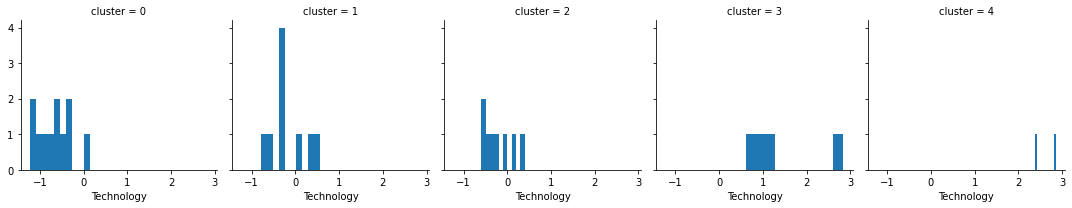

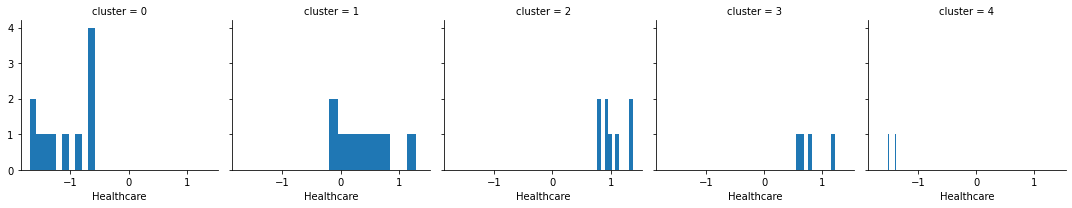

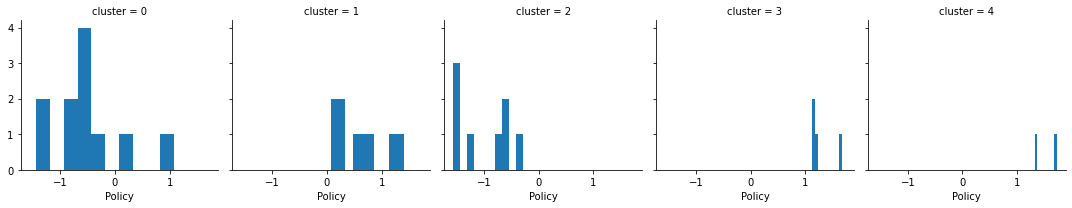

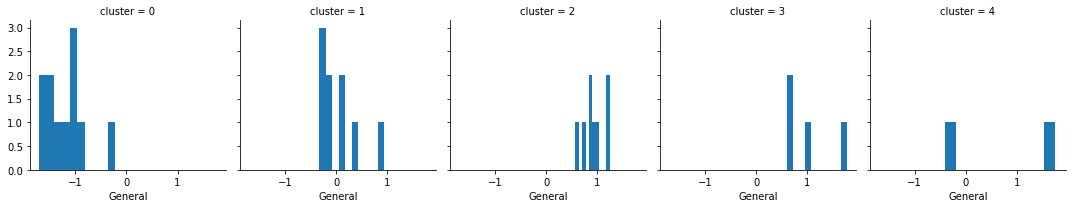

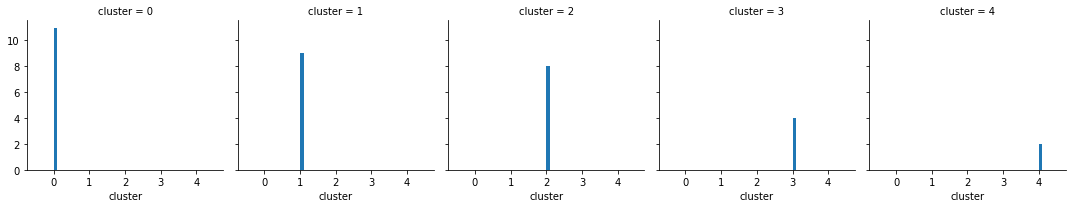

In [35]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

In [28]:
pd.concat([clusters, countries['country']], axis=1).to_csv('datasets/clustered_adv_countries.csv')

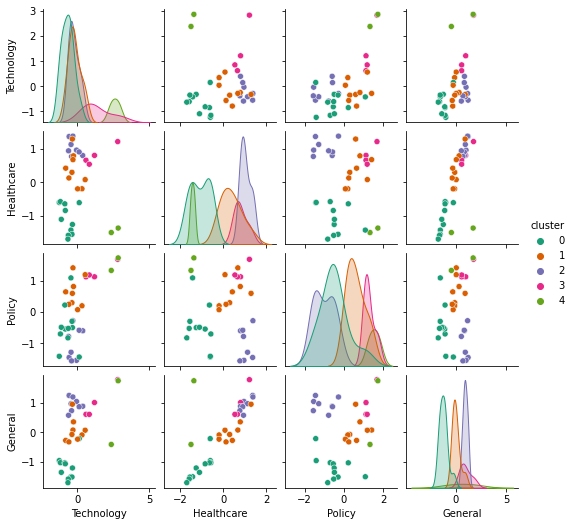

In [36]:
# Call Seaborn's pairplot to visualize our KMeans clustering on the PCA projected data

clustered_pairplot = sns.pairplot(clusters, hue='cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

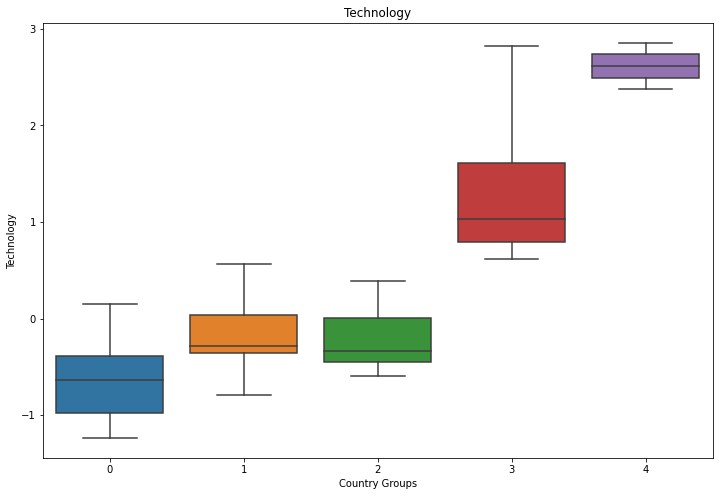

In [37]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(x='cluster',y='Technology',data=clusters)
plt.xlabel('Country Groups', fontsize=10)
plt.ylabel('Technology', fontsize=10)
plt.title('Technology')
plt.show()
fig.figure.savefig("Technology (6 clusters).png")

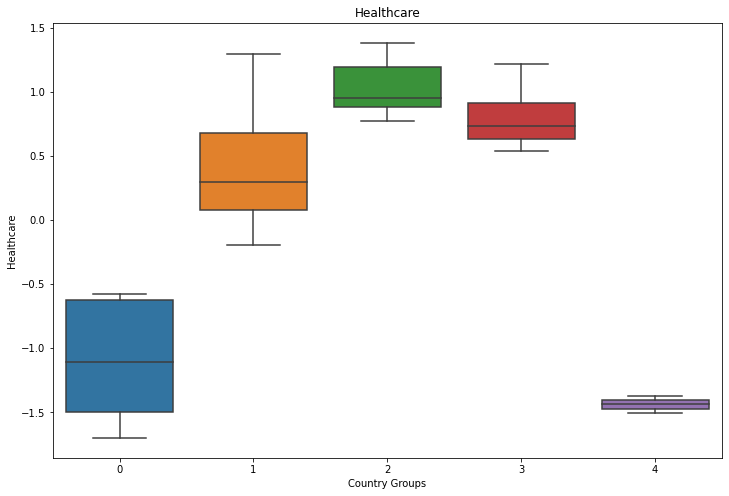

In [38]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(x='cluster',y='Healthcare',data=clusters)
plt.xlabel('Country Groups', fontsize=10)
plt.ylabel('Healthcare', fontsize=10)
plt.title('Healthcare')
plt.show()
fig.figure.savefig("Healthcare (6 clusters).png")

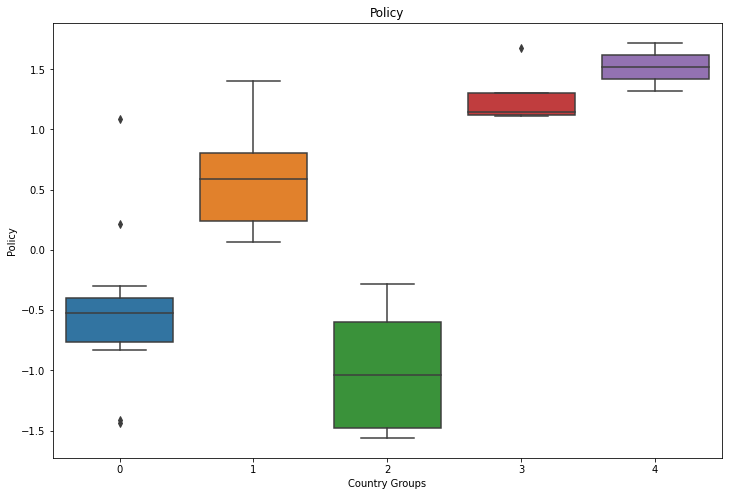

In [39]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(x='cluster',y='Policy',data=clusters)
plt.xlabel('Country Groups', fontsize=10)
plt.ylabel('Policy', fontsize=10)
plt.title('Policy')
plt.show()
fig.figure.savefig("Policy (6 clusters).png")

In [21]:
clustered_pairplot.figure.savefig("clustered_adv_med.png")

In [37]:
data_with_cl = pd.concat([total_df, pd.DataFrame({'cluster':labels}), countries['Country code']], axis=1)

In [38]:
covid = pd.read_csv('datasets/covid data.csv')

In [39]:
covid = covid.dropna()

In [40]:
combo = combo[combo['iso'].isin(covid['Country code'])]

In [41]:
combo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 0 to 185
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Socio-economic      181 non-null    float64
 1   Disease Prevalence  181 non-null    float64
 2   Environmental       181 non-null    float64
 3   Political           181 non-null    float64
 4   Categorical         181 non-null    float64
 5   iso                 181 non-null    object 
dtypes: float64(5), object(1)
memory usage: 9.9+ KB


In [42]:
from sklearn import linear_model
import statsmodels.api as sm

x = combo.iloc[:,:4]
#y = covid['cases per pop']
y = combo.Categorical

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:            Categorical   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              3106.
Date:                Tue, 27 Sep 2022   Prob (F-statistic):                   1.02e-162
Time:                        13:42:55   Log-Likelihood:                         -606.23
No. Observations:                 181   AIC:                                      1220.
Df Residuals:                     177   BIC:                                      1233.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [43]:
x = x.drop(columns = ["Socio-economic"])

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:            Categorical   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              4164.
Date:                Tue, 27 Sep 2022   Prob (F-statistic):                   1.46e-164
Time:                        13:47:16   Log-Likelihood:                         -606.23
No. Observations:                 181   AIC:                                      1218.
Df Residuals:                     178   BIC:                                      1228.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------